# Primeros ejemplos con Pandas

## Cargando conjuntos de datos

Vamos a emplear datos del libro Non-Life Insurance Pricing with GLM

<img src="http://staff.math.su.se/esbj/GLMbook/bokomslag.jpg" width="20%" height="20%">

Siempre llamamos a los paquetes que vamos a emplear, para simplificar asignamos un alias.

In [3]:
import pandas as pd

Importación de archivo de texto con formato

In [7]:
#Asignamos 
columnas = [(0, 2), (2,3), (3,4), (4,5), (5,7), (7,8), (8,16), (16,20), (20,28)]
data1 = pd.read_fwf("http://staff.math.su.se/esbj/GLMbook/mccase.txt", colspecs=columnas, header=None)
data1.head(10)

,0,1,2,3,4,5,6,7,8
0,0,M,1,4,12,1,0.175342,0,0
1,4,M,3,6,9,1,0.000000,0,0
2,5,K,3,3,18,1,0.454795,0,0
3,5,K,4,1,25,1,0.172603,0,0
4,6,K,2,1,26,1,0.180822,0,0
5,9,K,3,3,8,1,0.542466,0,0
6,9,K,4,3,6,1,0.000000,0,0
7,9,M,4,4,20,1,0.504110,0,0
8,10,M,2,3,16,1,0.150685,0,0
9,10,M,4,2,17,1,0.523288,0,0


Necesitamos asignar nombre a las columnas

In [8]:
data1.columns = ['edad','sexo','zona','clase_moto', 'antveh', 'bonus', 'exposicion', 'nsin', 'impsin']
data1.head()

,edad,sexo,zona,clase_moto,antveh,bonus,exposicion,nsin,impsin
0,0,M,1,4,12,1,0.175342,0,0
1,4,M,3,6,9,1,0.000000,0,0
2,5,K,3,3,18,1,0.454795,0,0
3,5,K,4,1,25,1,0.172603,0,0
4,6,K,2,1,26,1,0.180822,0,0


Al ser campos consecutivos podemos usar widths.

In [9]:
data1 = pd.read_fwf("http://staff.math.su.se/esbj/GLMbook/mccase.txt", widths = [2,1,1,1,2,1,8,4,8], header=None)
data1.columns = ['edad','sexo','zona','clase_moto', 'antveh', 'bonus', 'exposicion', 'nsin', 'impsin']
data1.head()

,edad,sexo,zona,clase_moto,antveh,bonus,exposicion,nsin,impsin
0,0,M,1,4,12,1,0.175342,0,0
1,4,M,3,6,9,1,0.000000,0,0
2,5,K,3,3,18,1,0.454795,0,0
3,5,K,4,1,25,1,0.172603,0,0
4,6,K,2,1,26,1,0.180822,0,0


In [10]:
data1["sexo"].unique()

array(['M', 'K'], dtype=object)

In [11]:
data1["bonus"].unique()

array([1, 2, 3, 4, 7, 5, 6], dtype=int64)

Ejemplos de sumarizaciones y agrupaciones

In [12]:
por_clase = data1.groupby("clase_moto")
print (por_clase.count())

             edad   sexo   zona  antveh  bonus  exposicion   nsin  impsin
clase_moto                                                               
1            7032   7032   7032    7032   7032        7032   7032    7032
2            5204   5204   5204    5204   5204        5204   5204    5204
3           18905  18905  18905   18905  18905       18905  18905   18905
4           12378  12378  12378   12378  12378       12378  12378   12378
5           11816  11816  11816   11816  11816       11816  11816   11816
6            8407   8407   8407    8407   8407        8407   8407    8407
7             806    806    806     806    806         806    806     806


In [15]:
por_sexo = data1[data1["clase_moto"]==3]
print (por_sexo.groupby("sexo").count())

       edad   zona  clase_moto  antveh  bonus  exposicion   nsin  impsin
sexo                                                                    
K      3677   3677        3677    3677   3677        3677   3677    3677
M     15228  15228       15228   15228  15228       15228  15228   15228


In [16]:
data1.groupby("sexo").count()

,edad,zona,clase_moto,antveh,bonus,exposicion,nsin,impsin
sexo,,,,,,,,
K,9853,9853,9853,9853,9853,9853,9853,9853
M,54695,54695,54695,54695,54695,54695,54695,54695


## Visualizaciones con pandas

Podemos hacer gráficos sencillos pero lo habitual es usar matplotlib

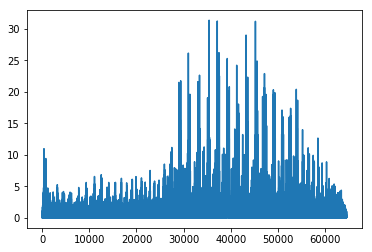

In [28]:
%matplotlib inline
data1['exposicion'].plot()

En este caso lo mejor es realizar un histograma

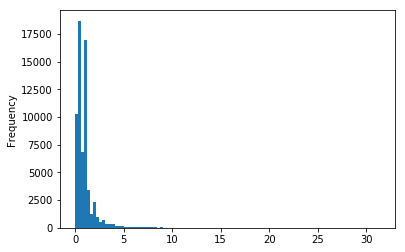

In [31]:
data1['exposicion'].plot(kind="hist", bins=100)

Se observa como se referencia una una variable como df['variable']

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

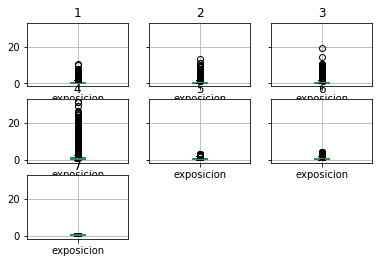

In [39]:
agrupacion_zona = data1.groupby("zona")
agrupacion_zona.boxplot(column="exposicion")

Disponemos de estadísticos básicos

In [17]:
# Máximo:
print (data1["exposicion"].max())

# La pósición de ese valor máximo:
print (data1["exposicion"].argmax())

31.33973
35405


C:\Users\rvaquerizo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """


Podemos acceder a  esa observación.

In [18]:
data1.iloc[35405]

edad               45
sexo                M
zona                4
clase_moto          5
antveh             16
bonus               7
exposicion    31.3397
nsin                0
impsin              0
Name: 35405, dtype: object

Si queremos un data frame tenemos la función DataFrame

In [34]:
pd.DataFrame(data1.loc[35405])

,35405
edad,45
sexo,M
zona,4
clase_moto,5
antveh,16
bonus,7
exposicion,31.3397
nsin,0
impsin,0


Preferimos los datos traspuestos

In [35]:
pd.DataFrame(data1.loc[35405]).transpose()

,edad,sexo,zona,clase_moto,antveh,bonus,exposicion,nsin,impsin
35405,45,M,4,5,16,7,31.3397,0,0


La función describe nos sumariza los principales estadísticos de una variable tanto numérica como categórica

In [36]:
data1["exposicion"].describe()

count    64548.000000
mean         1.010671
std          1.307424
min          0.000000
25%          0.463014
50%          0.827397
75%          1.000000
max         31.339730
Name: exposicion, dtype: float64

In [37]:
data1["sexo"].describe()

count     64548
unique        2
top           M
freq      54695
Name: sexo, dtype: object

## Subconjuntos de datos

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

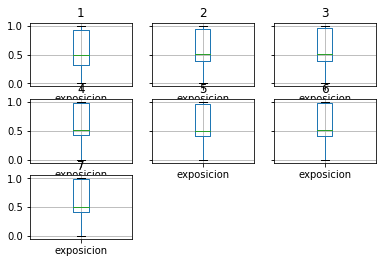

In [40]:
data2 = data1[data1['exposicion']<=1]
data2.groupby("zona").boxplot(column="exposicion")

Nos podemos encontrar otras formas de referenciar variables de un data frame

## Subconjuntos de variables

In [41]:
data3 = data2[['zona','antveh']]
data3.head()

,zona,antveh
0,1,12
1,3,9
2,3,18
3,4,25
4,2,26


In [42]:
#equivalente
varib = ['zona','antveh']
data4 = data2[varib]
data4.head()

,zona,antveh
0,1,12
1,3,9
2,3,18
3,4,25
4,2,26


Recordamos el uso de _magic functions_

In [43]:
%who

columnas	 data1	 data2	 data3	 data4	 pd	 por_clase	 por_sexo	 tmp	 
varib	 


La documentación está aquí https://github.com/lmmx/devnotes/wiki/IPython-'magic'-function-documentation

## Cruces de tablas

Queremos calcular una distancia a la media de la antigüedad del vehículo

In [58]:
agr_antveh = pd.DataFrame(data4.groupby("zona")['antveh'].mean())
agr_antveh.head()

,antveh
zona,
1,11.672601
2,12.215219
3,12.389702
4,14.104723
5,11.604842


Observemos el orden de aplicación de las funciones

In [59]:
data5 = pd.merge(data2, agr_antveh, how='left', on=['zona'])

In [60]:
data5.head()

,edad,sexo,zona,clase_moto,antveh_x,bonus,exposicion,nsin,impsin,antveh_y
0,0,M,1,4,12,1,0.175342,0,0,11.672601
1,4,M,3,6,9,1,0.000000,0,0,12.389702
2,5,K,3,3,18,1,0.454795,0,0,12.389702
3,5,K,4,1,25,1,0.172603,0,0,14.104723
4,6,K,2,1,26,1,0.180822,0,0,12.215219


Mejor renombrar la variable

In [61]:
agr_antveh = pd.DataFrame(data4.groupby("zona")['antveh'].mean())
agr_antveh = agr_antveh.rename(columns={'antveh': 'antveh_media'})

In [62]:
data5 = pd.merge(data2, agr_antveh, how='left', on=['zona'])
data5.head()

,edad,sexo,zona,clase_moto,antveh,bonus,exposicion,nsin,impsin,antveh_media
0,0,M,1,4,12,1,0.175342,0,0,11.672601
1,4,M,3,6,9,1,0.000000,0,0,12.389702
2,5,K,3,3,18,1,0.454795,0,0,12.389702
3,5,K,4,1,25,1,0.172603,0,0,14.104723
4,6,K,2,1,26,1,0.180822,0,0,12.215219


Ya estamos en disposición de calcular la diferencia con la media

In [65]:
data5['dif_antveh'] = data5.antveh - data5.antveh_media
data5.dif_antveh.describe()

count    4.994900e+04
mean     2.528990e-13
std      1.024148e+01
min     -1.410472e+01
25%     -7.389702e+00
50%     -1.104723e+00
75%      3.895277e+00
max      7.078478e+01
Name: dif_antveh, dtype: float64